In [1]:
import pandas as pd
from lib.preprocessing import *
from lib.cleaning import *
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor   
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.cross_decomposition import PLSRegression, PLSCanonical, PLSSVD
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
# from mpl_toolkits.basemap import Basemap
# import matplotlib.pyplot as plt
# %matplotlib inline
# import missingno as msno

### Exploration

In [2]:
df = load_sample(percentage=1)

In [3]:
cols = pd.Series(df.columns.format())

metrics = ["Temperature", "Precipitation in millimeters", "Distance (KM)"]  # 3 of these

ids = pd.concat([cols.loc[cols.str.match(".*Id.*")], cols.loc[cols.str.match(".*No.*")]]) # 3 of these

location = ["Pickup Lat", "Pickup Long", "Destination Lat", "Destination Long"] # 4 of these
times = cols.loc[cols.str.match(".*Time.*")] # 6(actually 4) of these

types = ["Vehicle Type", "Platform Type", "Personal or Business", ] # 3 of these


In [4]:
times

7                  Placement - Time
10              Confirmation - Time
13         Arrival at Pickup - Time
16                    Pickup - Time
19    Arrival at Destination - Time
28      Time from Pickup to Arrival
dtype: object

In [5]:
ids

1      User Id
27    Rider Id
0     Order No
dtype: object

In [6]:
desc = pd.read_csv("variable_definitions.csv")
desc

Variable Name  \
0                                    Order No   
1                                     User Id   
2                                Vehicle Type   
3                               Platform Type   
4                        Personal or Business   
5                    Placement - Day of Month   
6                Placement - Weekday (Mo = 1)   
7                            Placement - Time   
8                 Confirmation - Day of Month   
9             Confirmation - Weekday (Mo = 1)   
10                        Confirmation - Time   
11           Arrival at Pickup - Day of Month   
12       Arrival at Pickup - Weekday (Mo = 1)   
13                   Arrival at Pickup - Time   
14                      Pickup - Day of Month   
15                  Pickup - Weekday (Mo = 1)   
16                              Pickup - Time   
17      Arrival at Destination - Day of Month   
18  Arrival at Destination - Weekday (Mo = 1)   
19              Arrival at Destination - Time   
20                              Distance (KM)   
21                                Temperature   
22               Precipitation in millimeters   
23                                 Pickup Lat   
24                                Pickup Long   
25                            Destination Lat   
26                           Destination Long   
27                                   Rider Id   
28                Time from Pickup to Arrival   
29                              Rider Metrics   
30                                   Rider Id   
31                               No_Of_Orders   
32                                        Age   
33                             Average_Rating   
34                              No_of_Ratings   

                                          Description  
0                 Unique number identifying the order  
1   Unique number identifying the customer on a pl...  
2   For this competition limited to bikes, however...  
3   Platform used to place the order, there are 4 ...  
4                                       Customer type  
5                   Placement - Day of Month i.e 1-31  
6                    Placement - Weekday (Monday = 1)  
7   Placement - Time - Time of day the order was p...  
8                Confirmation - Day of Month i.e 1-31  
9                 Confirmation - Weekday (Monday = 1)  
10  Confirmation - Time - Time of day the order wa...  
11          Arrival at Pickup - Day of Month i.e 1-31  
12           Arrival at Pickup - Weekday (Monday = 1)  
13  Time of day the the rider arrived at the locat...  
14                     Pickup - Day of Month i.e 1-31  
15                      Pickup - Weekday (Monday = 1)  
16  Pickup - Time - Time of day the the rider pick...  
17        Arrival at Delivery - Day of Month i.e 1-31  
18         Arrival at Delivery - Weekday (Monday = 1)  
19  Arrival at Delivery Time - Time of day the rid...  
20            The distance from Pickup to Destination  
21  Temperature at the time of order placement in ...  
22  Precipitation at the time of order placement (...  
23                       Latitude of pick up location  
24                      Longitude of pick up location  
25                      Latitude of delivery location  
26                     Longitude of delivery location  
27             ID of the Rider who accepted the order  
28  Time in seconds between 'Pickup' and 'Arrival ...  
29                                                NaN  
30  Unique number identifying the rider (same as i...  
31           Number of Orders the rider has delivered  
32  Number of days since the rider delivered the f...  
33                        Average rating of the rider  
34  Number of ratings the rider has received. Rati...

<Axes: xlabel='Temperature', ylabel='Count'>

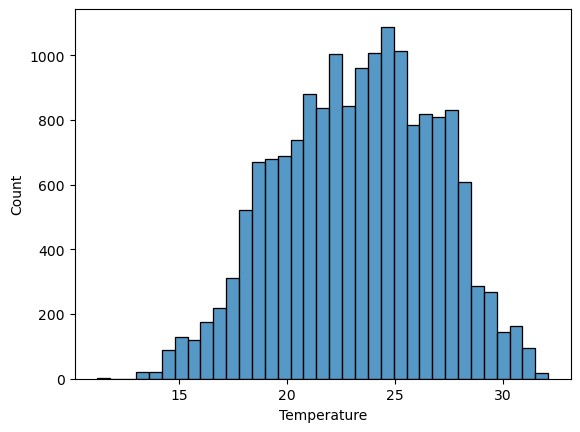

In [7]:
sns.histplot(df.Temperature, bins=35)

In [8]:
df.loc[(df['Placement - Day of Month'] < df["Pickup - Day of Month"])]

Order No       User Id Vehicle Type  Platform Type  \
2904  Order_No_2800  User_Id_1402         Bike              3   
3887  Order_No_3530  User_Id_2457         Bike              3   

     Personal or Business  Placement - Day of Month  \
2904             Business                        17   
3887             Business                        11   

      Placement - Weekday (Mo = 1) Placement - Time  \
2904                             1       2:34:37 PM   
3887                             2      12:22:05 PM   

      Confirmation - Day of Month  Confirmation - Weekday (Mo = 1)  ...  \
2904                           18                                2  ...   
3887                           13                                4  ...   

     Arrival at Destination - Time  Distance (KM)  Temperature  \
2904                    2:45:52 PM             11         25.6   
3887                    2:24:41 PM              8         22.5   

     Precipitation in millimeters  Pickup Lat  Pickup Long Destination Lat  \
2904                          NaN   -1.225322    36.808550       -1.281754   
3887                          NaN   -1.291548    36.829752       -1.255189   

      Destination Long      Rider Id Time from Pickup to Arrival  
2904         36.832423  Rider_Id_928                        2640  
3887         36.782203  Rider_Id_247                        1854  

[2 rows x 29 columns]

#### Post-model ideas

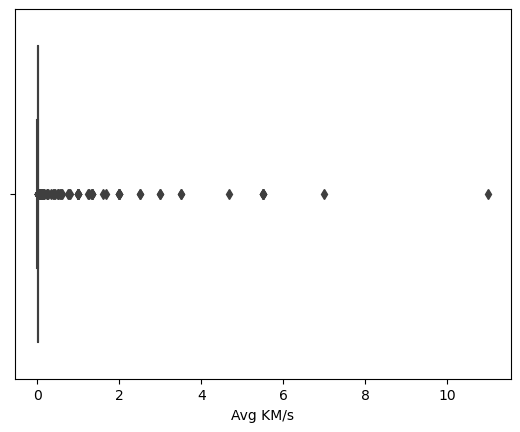

Slow/Fast people


53      0.042254
95      1.250000
97      1.000000
123     0.800000
177     0.161290
          ...   
1237    0.000530
1241    0.000612
1347    0.000547
1420    0.000334
1884    0.001064
Name: Avg KM/s, Length: 87, dtype: float64

In [9]:
df = load_sample(percentage=0.1, sql_db="data/cleaned_alex_emily_nelson.db")
df['Avg KM/s'] = df['Distance (KM)'] / df['Time from Pickup to Arrival']

sns.boxplot(df, x = "Avg KM/s")
plt.show()

speeders = df[test_data['Avg KM/s'] > 150/3600]
snails = df[df['Avg KM/s'] < 4/3600]
speed_anomalies = pd.concat([speeders, snails])
print(f"Slow/Fast people")
speed_anomalies['Avg KM/s']


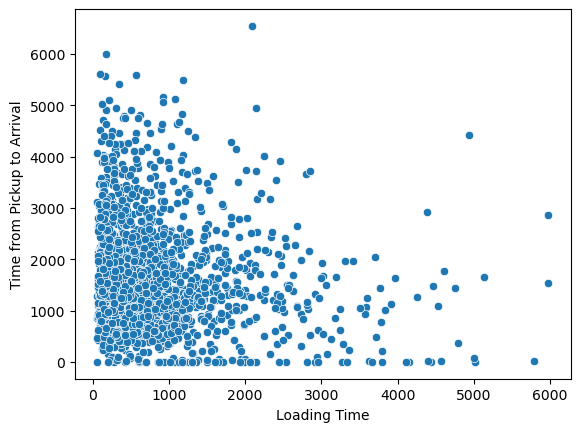

In [10]:
df['Loading Time'] = (df['Pickup - Time'].astype("datetime64") - df["Arrival at Pickup - Time"].astype("datetime64")).dt.total_seconds()
# sns.boxplot(x=df['Loading Time'])
# plt.show()

sns.scatterplot(df, x="Loading Time", y="Time from Pickup to Arrival")
plt.show()

In [11]:
probably_mistimed = df.loc[
    (df['Loading Time'] > (pd.to_timedelta(df['Time from Pickup to Arrival'], unit='sec').dt.total_seconds() * 1.5)) & \
    (df['Time from Pickup to Arrival'] < 10)
]

# ultra_weird = speed_anomalies.join(maybe_mistimed, how="inner", rsuffix='_d')
probably_mistimed[["Placement - Time", "Confirmation - Time", "Arrival at Pickup - Time", "Pickup - Time" , "Time from Pickup to Arrival", "Distance (KM)", "Avg KM/s"]]
# oof = maybe_mistimed[["Placement - Time", "Confirmation - Time", "Arrival at Pickup - Time", "Pickup - Time"]].copy()

# seconds_to_time_str = lambda s: f"{(s%(12*3600))//3600}:{(s%3600)//60:02d}:{s%60:02d} {'AM' if (s%(24*3600))//3600 < 12 else 'PM'}"
# df['Arrival at Destination - Time'] = get_seconds_from_dt_series(df["Pickup - Time"].astype("datetime64") + pd.to_timedelta(df["Time from Pickup to Arrival"], unit="sec")).apply(seconds_to_time_str)

Placement - Time Confirmation - Time Arrival at Pickup - Time  \
95         3:40:41 PM          3:45:48 PM               4:07:25 PM   
97         3:44:28 PM          3:50:40 PM               3:55:54 PM   
123       10:34:19 AM         10:35:28 AM              10:36:14 AM   
217       11:35:45 AM         11:36:02 AM              11:36:24 AM   
223        4:08:09 PM          4:08:37 PM               4:08:43 PM   
242        7:06:53 PM          7:07:15 PM               7:20:45 PM   
387        3:41:04 PM          3:53:02 PM               3:53:04 PM   
388       12:07:03 PM         12:13:37 PM              12:13:49 PM   
454        3:03:51 PM          3:11:16 PM               3:48:33 PM   
514        8:56:12 AM         10:00:20 AM              10:00:31 AM   
569        2:42:31 PM          2:42:50 PM               2:43:09 PM   
719       12:46:45 PM         12:46:52 PM              12:53:11 PM   
787       12:53:15 PM         12:53:57 PM               1:13:16 PM   
839        2:04:25 PM          2:04:33 PM               2:05:00 PM   
845        3:42:33 PM          3:57:28 PM               3:57:31 PM   
872       10:18:12 AM         10:18:45 AM              10:47:41 AM   
883        9:11:17 AM          9:12:29 AM              10:02:12 AM   
912        2:11:19 PM          2:12:08 PM               2:12:35 PM   
955        3:33:13 PM          3:34:36 PM               3:34:43 PM   
1015       4:17:18 PM          4:17:34 PM               4:27:45 PM   
1025       2:46:18 PM          2:46:38 PM               2:48:19 PM   
1057       3:29:18 PM          3:29:28 PM               3:29:39 PM   
1116       1:59:39 PM          2:02:54 PM               2:02:57 PM   
1128       5:03:34 PM          5:04:08 PM               5:15:14 PM   
1264       2:35:46 PM          2:37:54 PM               2:38:03 PM   
1269       3:38:49 PM          3:39:03 PM               3:39:25 PM   
1462       3:51:27 PM          4:00:53 PM               4:00:57 PM   
1478      10:27:10 AM         10:27:17 AM              10:30:15 AM   
1487       1:07:34 PM          1:07:54 PM               1:12:04 PM   
1514       4:27:55 PM          4:34:54 PM               4:35:35 PM   
1533       4:27:15 PM          4:27:15 PM               4:28:52 PM   
1575      10:00:11 AM         10:00:29 AM              10:14:33 AM   
1622       8:25:20 AM          8:25:36 AM               8:25:43 AM   
1662       4:10:14 PM          4:12:28 PM               4:25:51 PM   
1663       3:33:53 PM          3:38:14 PM               3:47:37 PM   
1836       3:54:08 PM          3:55:39 PM               4:01:07 PM   
1872      11:33:14 AM         11:50:36 AM              11:51:30 AM   
1894       2:49:21 PM          3:00:06 PM               3:02:40 PM   
1917       8:43:35 AM          8:48:23 AM               9:02:47 AM   
1921      10:49:04 AM         10:50:09 AM              11:05:02 AM   
1927      12:38:00 PM         12:42:52 PM              12:54:58 PM   
2002       3:54:04 PM          4:04:08 PM               4:04:21 PM   
2021       3:59:20 PM          4:00:32 PM               4:20:41 PM   
2033      12:18:13 PM         12:18:23 PM              12:18:57 PM   
2087      10:39:42 AM         10:41:03 AM              10:45:33 AM   

     Pickup - Time  Time from Pickup to Arrival  Distance (KM)   Avg KM/s  
95      5:16:34 PM                            4              5   1.250000  
97      4:20:59 PM                            5              5   1.000000  
123    11:11:26 AM                            5              4   0.800000  
217    11:55:29 AM                            6              2   0.333333  
223     5:12:01 PM                            3              4   1.333333  
242     8:09:18 PM                            6             12   2.000000  
387     4:54:13 PM                            2             11   5.500000  
388    12:31:54 PM                            8              3   0.375000  
454     5:02:31 PM                            2              7   3.500000  
514    10:42:42 AM      

### Cleaning Data

#### Nelson cleaned data

In [12]:
df = load_sample(percentage=1, csv_file="data/train_full.csv")
df = drops(df)
df = impute_temperature(df)
df = combine_weekdays(df)
df.head(3)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but IterativeImputer was fitted without feature names
  warnings.warn(


Order No       User Id Vehicle Type  Platform Type  \
0  Order_No_10250  User_Id_1966         Bike              3   
1  Order_No_24034  User_Id_2982         Bike              3   
2   Order_No_4590  User_Id_3494         Bike              3   

  Personal or Business  Placement - Day of Month  \
0             Business                        11   
1             Business                        14   
2             Personal                        21   

   Placement - Weekday (Mo = 1) Placement - Time Confirmation - Time  \
0                             1      12:51:48 PM         12:52:30 PM   
1                             4       4:06:38 PM          4:07:02 PM   
2                             1       1:01:36 PM          1:06:16 PM   

  Arrival at Pickup - Time  ... Distance (KM)  Temperature  Pickup Lat  \
0               1:06:25 PM  ...            21         29.0   -1.370038   
1               4:07:20 PM  ...            18         26.5   -1.300921   
2               1:11:57 PM  ...             7         19.8   -1.285642   

   Pickup Long  Destination Lat  Destination Long      Rider Id  \
0    36.919017        -1.291787         36.787267  Rider_Id_238   
1    36.828195        -1.177202         36.835118  Rider_Id_661   
2    36.826077        -1.296310         36.768822  Rider_Id_680   

  Time from Pickup to Arrival  Fulfillment - Weekday (Su = 0)  \
0                        2096                               1   
1                        2677                               4   
2                         929                               1   

   Fulfillment - Day of Month  
0                          11  
1                          14  
2                          21  

[3 rows x 21 columns]

<Axes: xlabel='Temperature', ylabel='Count'>

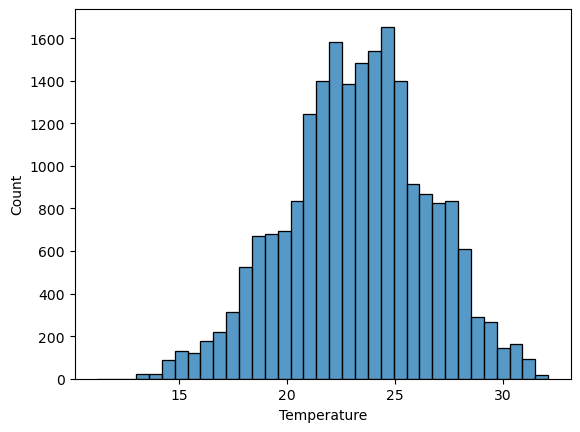

In [13]:
sns.histplot(df.Temperature, bins=35)

#### Emily Cleaning

In [14]:
data = load_sample(percentage = 1, sql_db='data/cleaned_nelson.db')

for i in ['Order No', 'User Id', "Rider Id"]:
    under = i.replace(' ', '_')
    data.rename(columns={i: under}, inplace=True)
    data[under] = data[under].str.replace(f'{under}_', '')
    data[under] = data[under].astype(int)

save_data(data, sql_db='data/cleaned_emily.db')

#### Merging Emily w/ Nelson

In [15]:
em = load_sample(percentage=1, sql_db="data/cleaned_emily.db")
em.rename({
    "Order_No" : "order_no",
    "User_Id" : "user_id",
    "Rider_Id" : "rider_id"
}, axis=1, inplace=True)
em.head(3)

order_no  user_id Vehicle Type  Platform Type Personal or Business  \
0     10013     1824         Bike              3             Business   
1     17510     2330         Bike              3             Business   
2     10446      978         Bike              1             Personal   

   Placement - Day of Month  Placement - Weekday (Mo = 1) Placement - Time  \
0                        31                             3       3:43:55 PM   
1                        26                             2       6:33:37 PM   
2                        20                             3      12:48:38 PM   

  Confirmation - Time Arrival at Pickup - Time  ... Distance (KM)  \
0          3:53:57 PM               4:01:38 PM  ...             6   
1          7:13:57 PM               7:24:11 PM  ...             7   
2         12:48:45 PM              12:56:31 PM  ...            25   

   Temperature  Pickup Lat  Pickup Long  Destination Lat  Destination Long  \
0         26.8   -1.267400    36.798654        -1.297213         36.786212   
1         22.7   -1.232571    36.808392        -1.264960         36.798178   
2         20.1   -1.308407    36.834501        -1.430298         36.961368   

   rider_id  Time from Pickup to Arrival  Fulfillment - Weekday (Su = 0)  \
0        19                         1358                               3   
1        72                         1182                               2   
2       549                         1943                               3   

   Fulfillment - Day of Month  
0                          31  
1                          26  
2                          20  

[3 rows x 21 columns]

In [16]:
save_data(em, sql_db="data/cleaned_emily_nelson.db")

#### Alex Cleaning

In [17]:
riders = pd.read_csv("data/riders.csv")

# rename cols-- easier to work with
riders.rename(columns= {
    "Rider Id": "id",
    "No_Of_Orders": "orders",
    "Age": "age",
    "Average_Rating": "average_rating",
    "No_of_Ratings": "number_rating" 
}, inplace=True)

# drop "Rider_Id_" in "id" column
riders.id.replace('Rider_Id_', ' ',regex=True,inplace=True)

riders.head(3)

id  orders   age  average_rating  number_rating
0   396    2946  2298            14.0           1159
1   479     360   951            13.5            176
2   648    1746   821            14.3            466

In [18]:
save_data(riders, sql_db="data/cleaned_Alex.db")

#### Merging Alex w/ Emily+Nelson

In [19]:
riders_clean = load_sample(percentage=1, sql_db="data/cleaned_Alex.db")
riders_clean["id"] = riders_clean["id"].astype(int)
riders_clean.set_index("id", inplace=True)
riders_clean.head(3)
# riders_clean.dtypes

orders   age  average_rating  number_rating
id                                              
452     570   741            14.0             98
574    1753  1011            13.8            472
150     179   493            15.0              3

In [20]:
other_clean = load_sample(percentage=1, sql_db="data/cleaned_emily_nelson.db")
other_clean.head(3)

order_no  user_id Vehicle Type  Platform Type Personal or Business  \
0     14660     1796         Bike              3             Business   
1     25887     1075         Bike              3             Business   
2     12793      111         Bike              3             Business   

   Placement - Day of Month  Placement - Weekday (Mo = 1) Placement - Time  \
0                        14                             4       3:18:22 PM   
1                         5                             3       5:02:33 PM   
2                        19                             2      12:43:18 PM   

  Confirmation - Time Arrival at Pickup - Time  ... Distance (KM)  \
0          3:21:19 PM               3:21:29 PM  ...            13   
1          5:33:55 PM               5:44:37 PM  ...            10   
2         12:43:54 PM              12:43:59 PM  ...            13   

   Temperature  Pickup Lat  Pickup Long  Destination Lat  Destination Long  \
0         27.4   -1.303596    36.778378        -1.331619         36.847976   
1         22.5   -1.301446    36.766138        -1.252796         36.800313   
2         26.5   -1.255189    36.782203        -1.327035         36.866736   

   rider_id  Time from Pickup to Arrival  Fulfillment - Weekday (Su = 0)  \
0       669                         1765                               4   
1       685                         1452                               3   
2       576                         3159                               2   

   Fulfillment - Day of Month  
0                          14  
1                           5  
2                          19  

[3 rows x 21 columns]

In [21]:
cleaned_all = other_clean.join(riders_clean, on="rider_id", rsuffix="_rider")
cleaned_all.head(3)

order_no  user_id Vehicle Type  Platform Type Personal or Business  \
0     14660     1796         Bike              3             Business   
1     25887     1075         Bike              3             Business   
2     12793      111         Bike              3             Business   

   Placement - Day of Month  Placement - Weekday (Mo = 1) Placement - Time  \
0                        14                             4       3:18:22 PM   
1                         5                             3       5:02:33 PM   
2                        19                             2      12:43:18 PM   

  Confirmation - Time Arrival at Pickup - Time  ... Destination Lat  \
0          3:21:19 PM               3:21:29 PM  ...       -1.331619   
1          5:33:55 PM               5:44:37 PM  ...       -1.252796   
2         12:43:54 PM              12:43:59 PM  ...       -1.327035   

   Destination Long  rider_id  Time from Pickup to Arrival  \
0         36.847976       669                         1765   
1         36.800313       685                         1452   
2         36.866736       576                         3159   

   Fulfillment - Weekday (Su = 0)  Fulfillment - Day of Month  orders   age  \
0                               4                          14    6728  2702   
1                               3                           5     487   560   
2                               2                          19    1486   454   

   average_rating  number_rating  
0            13.9           2027  
1            13.7             44  
2            14.2            151  

[3 rows x 25 columns]

In [22]:
save_data(cleaned_all, sql_db="data/cleaned_alex_emily_nelson.db")

#### Final Cleaning

In [23]:
df = load_sample(percentage=1, sql_db="data/cleaned_alex_emily_nelson.db")
avg_kms = df['Distance (KM)'] / df['Time from Pickup to Arrival']

speeders = df[avg_kms > 150/3600]
snails = df[avg_kms < 4/3600]
speed_anomalies = pd.concat([speeders, snails])

df = df.drop(speed_anomalies.index)

In [24]:
# l_time = (df['Pickup - Time'].astype("datetime64") - df["Arrival at Pickup - Time"].astype("datetime64")).dt.total_seconds()
# probably_mistimed = df.loc[
#     # (l_time > (pd.to_timedelta(df['Time from Pickup to Arrival'], unit='sec').dt.total_seconds() * 1.5)) & \
#     (df['Time from Pickup to Arrival'] < 60)
# ]

# probably_mistimed[["Placement - Time", "Confirmation - Time", "Arrival at Pickup - Time", "Pickup - Time" , "Time from Pickup to Arrival", "Distance (KM)"]]
# df.drop(probably_mistimed.index)

In [25]:
save_data(df, sql_db="data/cleaned_train.db")

### Model

#### Preparing

In [59]:
df = load_sample(percentage=1, sql_db="data/cleaned_train.db")

df["Placement - Time"] = get_seconds_from_dt_series(df['Placement - Time'])
df["Confirmation - Time"] = get_seconds_from_dt_series(df['Confirmation - Time'])
df["Arrival at Pickup - Time"] = get_seconds_from_dt_series(df['Arrival at Pickup - Time'])
df["Pickup - Time"] = get_seconds_from_dt_series(df['Pickup - Time'])
df["Business"] = (df['Personal or Business'] == "Business").astype(float)
df["place_to_confirm"] = df["Confirmation - Time"] - df["Placement - Time"]
df["confirm_to_pick_arr"] = df["Arrival at Pickup - Time"] - df["Confirmation - Time"]
df["pick_arr_to_pick"] = df['Pickup - Time'] - df["Arrival at Pickup - Time"]
df['platform_3'] = (df['Platform Type'] == 3).astype(float)
df.drop(columns=["Personal or Business", "Vehicle Type", "Platform Type"], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20252 entries, 0 to 20251
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   order_no                        20252 non-null  int64  
 1   user_id                         20252 non-null  int64  
 2   Placement - Day of Month        20252 non-null  int64  
 3   Placement - Weekday (Mo = 1)    20252 non-null  int64  
 4   Placement - Time                20252 non-null  int64  
 5   Confirmation - Time             20252 non-null  int64  
 6   Arrival at Pickup - Time        20252 non-null  int64  
 7   Pickup - Time                   20252 non-null  int64  
 8   Distance (KM)                   20252 non-null  int64  
 9   Temperature                     20252 non-null  float64
 10  Pickup Lat                      20252 non-null  float64
 11  Pickup Long                     20252 non-null  float64
 12  Destination Lat                 

In [3]:
train, test = train_test_split(df, test_size=0.2)
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
train.shape

(16201, 27)

In [4]:
dont_scale = ["order_no", "user_id", "rider_id", "Business", "platform_3", 'Time from Pickup to Arrival']


scaler = StandardScaler()
s = scaler.fit(train[train.columns[~train.columns.isin(dont_scale)]])

In [5]:
train = pd.concat([
        pd.DataFrame(
            scaler.transform(train[train.columns[~train.columns.isin(dont_scale)]]), 
            columns = df.columns[~df.columns.isin(dont_scale)]
        ),
        train[df.columns[df.columns.isin(dont_scale)]]
    ], 
    join="inner",
    axis=1
)

In [6]:
xtest = scaler.transform(test[df.columns[~df.columns.isin(dont_scale)]])
test = pd.concat([
        pd.DataFrame(xtest, columns = df.columns[~df.columns.isin(dont_scale)]), 
        test[df.columns[df.columns.isin(dont_scale)]]
    ], 
    axis=1
)

In [7]:
if False:
    sns.pairplot(train[[
        # "Placement - Day of Month", 
        # "Placement - Weekday (Mo = 1)", 
        # "Placement - Time", 
        # "Confirmation - Time",
        # "Arrival at Pickup - Time",
        # "Pickup - Time",
        "place_to_confirm",
        "confirm_to_pick_arr",
        "pick_arr_to_pick",
        "Distance (KM)",
        "Temperature",
        # "Pickup Lat",
        # "Pickup Long",
        # "Destination Lat",
        # "Destination Long",
        # "Fulfillment - Weekday (Su = 0)",
        # "Fulfillment - Day of Month",
        "orders",
        "age",
        "average_rating",
        "number_rating",
        "Business"
    ]])

#### Tuning

In [8]:
def assess_model(model) -> pd.DataFrame:
    return pd.DataFrame(cross_validate(
        model, 
        train[train.columns[train.columns!='Time from Pickup to Arrival']],
        train[['Time from Pickup to Arrival']],
        scoring={"neg_mse": "neg_mean_squared_error", "neg_mae": "neg_mean_absolute_error"}
    ))

models = {
    "DTree": DecisionTreeRegressor(random_state=42),
    "OLS" : LinearRegression(),
    "Lasso" : Lasso(random_state=42),
    "Ridge" : Ridge(random_state=42),
    "PLSReg" : PLSRegression(),
    "PLSCan" : PLSCanonical(),
    # "PLSSVD" : PLSSVD()
    # (KNeighborsRegressor(n_neighbors=20), "20-KNN"),
    # (SGDRegressor(), "SGD"),
    # (GaussianProcessRegressor(), "Gaussian"),
    # (MLPRegressor(), "Dense NN")
}

In [9]:
import warnings
warnings.filterwarnings('ignore')
rfes = {}
for name, model in models.items():
    rfe = RFECV(estimator=model, scoring="neg_mean_absolute_error")
    rfe.fit(
        train[train.columns[train.columns!='Time from Pickup to Arrival']], 
        train[['Time from Pickup to Arrival']]
    )

    print('Selected', rfe.n_features_, f'features for {name}:')
    print(train.columns[train.columns!='Time from Pickup to Arrival'][rfe.support_], end='\n\n')

    rfes[name] = rfe

warnings.filterwarnings('default')

Selected 2 features for DTree:
Index(['Distance (KM)', 'pick_arr_to_pick'], dtype='object')

Selected 20 features for OLS:
Index(['Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Pickup Long', 'Destination Lat',
       'Destination Long', 'Fulfillment - Weekday (Su = 0)',
       'Fulfillment - Day of Month', 'orders', 'age', 'average_rating',
       'number_rating', 'place_to_confirm', 'confirm_to_pick_arr',
       'pick_arr_to_pick', 'platform_3'],
      dtype='object')

Selected 17 features for Lasso:
Index(['Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Arrival at Pickup - Time', 'Distance (KM)', 'Temperature',
       'Pickup Long', 'Destination Lat', 'Destination Long',
       'Fulfillment - Weekday (Su = 0)', 'orders', 'age', 'average_rating',
       'number_rating', 'place_to_confirm', 'confirm_to_pick_arr',
       'pick_arr_to_pick', 

In [10]:
results = {}
for mod, rfe in rfes.items():
    results[mod] = pd.DataFrame(rfes[mod].cv_results_).iloc[-1]
    print(f"Scores for {mod}:")
    print(results[mod], end='\n\n')

Scores for DTree:
mean_test_score     -722.376357
std_test_score        15.111928
split0_test_score   -728.011416
split1_test_score   -695.847222
split2_test_score   -720.125000
split3_test_score   -725.782716
split4_test_score   -742.115432
Name: 25, dtype: float64

Scores for OLS:
mean_test_score     -514.711412
std_test_score         7.990052
split0_test_score   -528.252944
split1_test_score   -506.686267
split2_test_score   -517.733761
split3_test_score   -514.036412
split4_test_score   -506.847674
Name: 25, dtype: float64

Scores for Lasso:
mean_test_score     -514.729061
std_test_score         7.855241
split0_test_score   -528.146851
split1_test_score   -506.839941
split2_test_score   -517.533467
split3_test_score   -514.002290
split4_test_score   -507.122758
Name: 25, dtype: float64

Scores for Ridge:
mean_test_score     -514.693210
std_test_score         7.970591
split0_test_score   -528.274055
split1_test_score   -506.708107
split2_test_score   -517.509583
split3_test_score   

In [11]:
def component_plots(mod: str) -> None:
    rfe = rfes[mod]
    cols = train.columns[train.columns!='Time from Pickup to Arrival'][rfe.support_]
    X = train[cols]
    Y = train[['Time from Pickup to Arrival']]
    model = rfe.estimator
    model.fit(X, Y)
    pred = model.predict(X)

    fig, ax = plt.subplots(1, len(cols), sharey=True)
    fig.set_size_inches((len(cols) * 6, 6))
    plt.ylabel("Time from Pickup to Arrival")
    ys = train[['Time from Pickup to Arrival']]
    for xax, col_name in enumerate(cols):
        xs = train[col_name]
        ax[xax].scatter(xs, ys)
        ax[xax].scatter(xs, pred)
        ax[xax].set(xlabel=col_name)
    plt.show()

DTree:


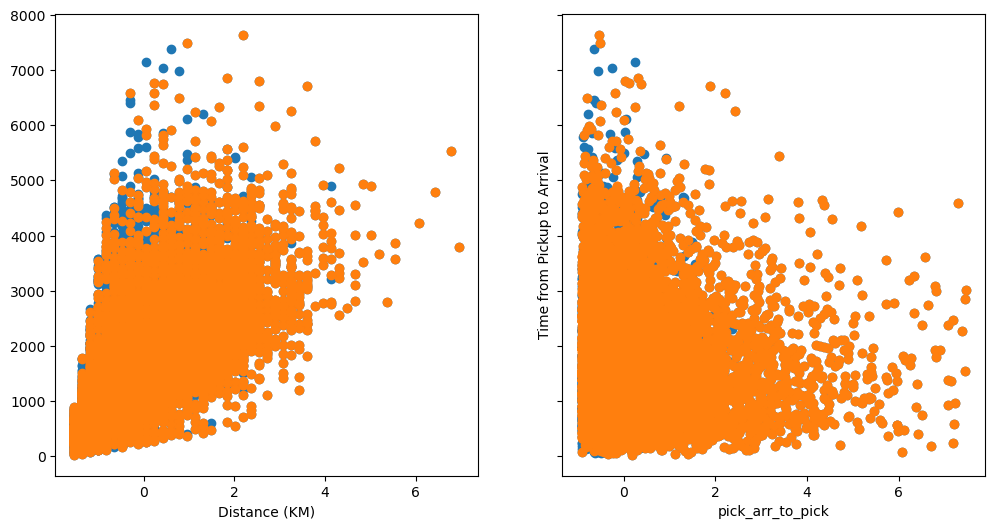

OLS:


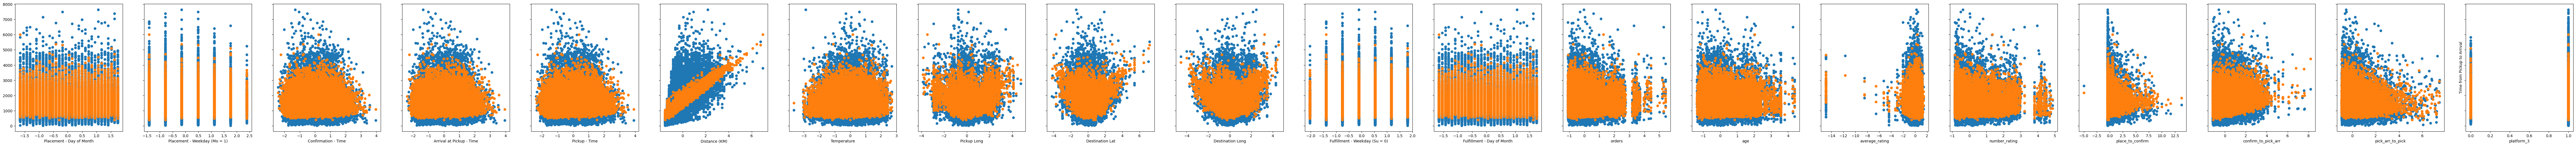

Lasso:


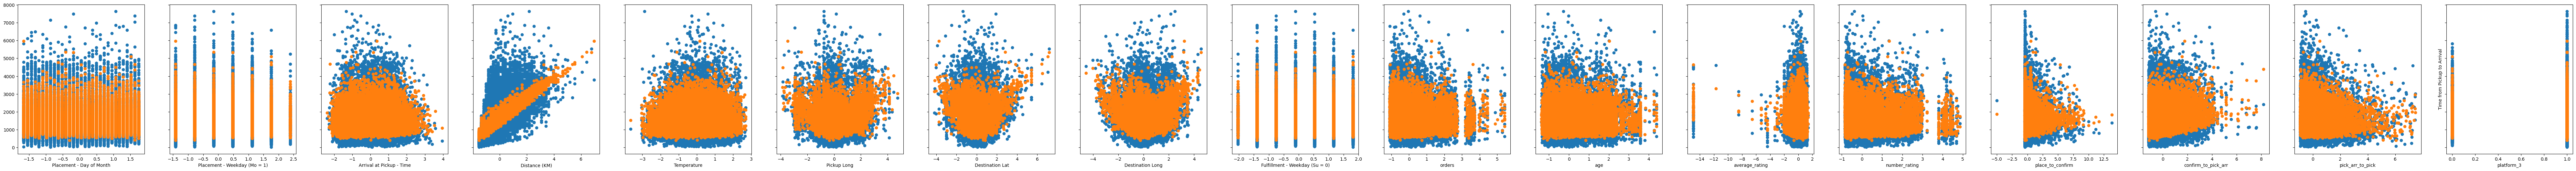

Ridge:


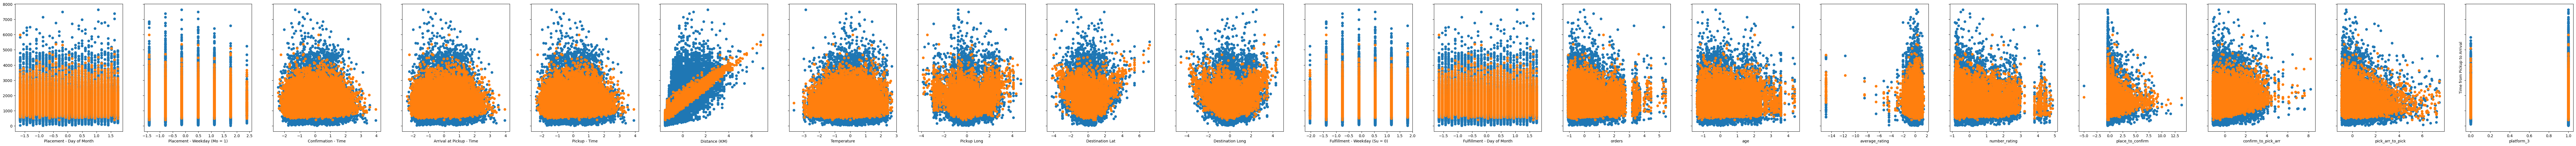

PLSReg:


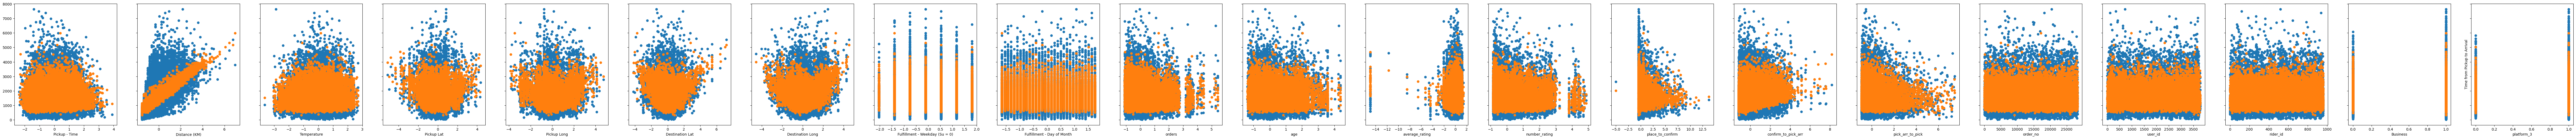

PLSCan:


/opt/conda/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:245: FutureWarning: As of version 0.24, n_components(2) should be in [1, min(n_features, n_samples, n_targets)] = [1, 1]. n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(


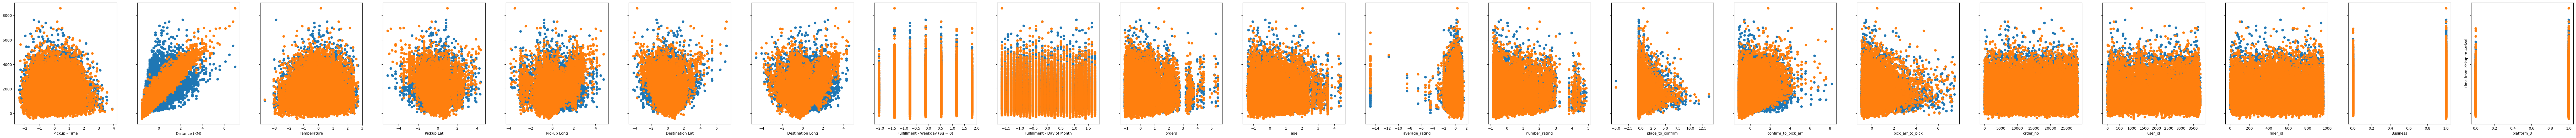

In [12]:
for mod in models.keys():
    print(f"{mod}:")
    component_plots(mod)

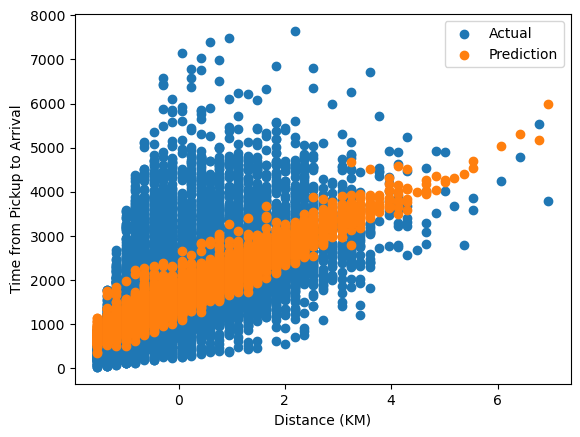

In [13]:
mod = "PLSReg"
x_feature = "Distance (KM)"
ys = train['Time from Pickup to Arrival']
pred = rfes[mod].estimator.predict(train[train.columns[train.columns!='Time from Pickup to Arrival'][rfes[mod].support_]])
plt.scatter(train[x_feature], ys, label="Actual")
plt.scatter(train[x_feature], pred, label="Prediction")
plt.xlabel(x_feature)
plt.ylabel("Time from Pickup to Arrival")
plt.legend()
plt.show()

In [14]:
plsr_train_X = train[train.columns[train.columns!='Time from Pickup to Arrival'][rfes['PLSReg'].support_]]
train_y = train[['Time from Pickup to Arrival']]

plsr_test_X = test[test.columns[test.columns!='Time from Pickup to Arrival'][rfes['PLSReg'].support_]]
test_y = test[['Time from Pickup to Arrival']]

#### Testing

In [15]:
def test_model(model, test_X):
    mae = mean_absolute_error(test_y, model.predict(test_X))
    mape = mean_absolute_percentage_error(test_y, model.predict(test_X))
    return { "MAE" : mae, 'MA%E' : mape }

    
models['PLSReg'].fit(plsr_train_X, train_y)

PLSRegression()

In [16]:
test_model(models['PLSReg'], plsr_test_X)

{'MAE': 508.99690904564045, 'MA%E': 0.4172547109902355}

#### Submission

##### Data Prep

###### Train

In [51]:
df = load_sample(percentage=1, sql_db="data/cleaned_train.db")
df["Placement - Time"] = get_seconds_from_dt_series(df['Placement - Time'])
df["Confirmation - Time"] = get_seconds_from_dt_series(df['Confirmation - Time'])
df["Arrival at Pickup - Time"] = get_seconds_from_dt_series(df['Arrival at Pickup - Time'])
df["Pickup - Time"] = get_seconds_from_dt_series(df['Pickup - Time'])
df["Business"] = (df['Personal or Business'] == "Business").astype(float)
df["place_to_confirm"] = df["Confirmation - Time"] - df["Placement - Time"]
df["confirm_to_pick_arr"] = df["Arrival at Pickup - Time"] - df["Confirmation - Time"]
df["pick_arr_to_pick"] = df['Pickup - Time'] - df["Arrival at Pickup - Time"]
df['platform_3'] = (df['Platform Type'] == 3).astype(float)
df.drop(columns=["Personal or Business", "Vehicle Type", "Platform Type"], inplace=True)

In [52]:
other_series = get_minute_from_dt_series(df["Placement - Time"])
temp_control = pd.concat(
    [
        df[[
            "Placement - Day of Month", 
            "Placement - Weekday (Mo = 1)", 
            "Pickup Long", 
            "Pickup Lat",
            "Destination Long",
            "Destination Lat",
            "Distance (KM)",
            "Temperature"
        ]],
        other_series
    ],
    axis=1
)

imputer = IterativeImputer(random_state=42)
imputer.fit(temp_control.to_numpy())
df['Temperature'] = imputer.transform(temp_control)[:, -2]

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but IterativeImputer was fitted without feature names
  warnings.warn(


In [53]:
dont_scale = ["order_no", "user_id", "rider_id", "Business", "platform_3", 'Time from Pickup to Arrival']

scaler = StandardScaler()
s = scaler.fit(df[df.columns[~df.columns.isin(dont_scale)]])
train = pd.concat([
        pd.DataFrame(
            scaler.transform(df[df.columns[~df.columns.isin(dont_scale)]]), 
            columns = df.columns[~df.columns.isin(dont_scale)]
        ),
        df[df.columns[df.columns.isin(dont_scale)]]
    ], 
    join="inner",
    axis=1
)

###### Test

In [54]:
test_data = load_sample(percentage=1, csv_file="data/test.csv")

In [55]:
test_data.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Precipitation in millimeters',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id'],
      dtype='object')

In [56]:
test_data["Placement - Time"] = get_seconds_from_dt_series(test_data['Placement - Time'])
test_data["Confirmation - Time"] = get_seconds_from_dt_series(test_data['Confirmation - Time'])
test_data["Arrival at Pickup - Time"] = get_seconds_from_dt_series(test_data['Arrival at Pickup - Time'])
test_data["Pickup - Time"] = get_seconds_from_dt_series(test_data['Pickup - Time'])
test_data["Business"] = (test_data['Personal or Business'] == "Business").astype(float)
test_data["place_to_confirm"] = test_data["Confirmation - Time"] - test_data["Placement - Time"]
test_data["confirm_to_pick_arr"] = test_data["Arrival at Pickup - Time"] - test_data["Confirmation - Time"]
test_data["pick_arr_to_pick"] = test_data['Pickup - Time'] - test_data["Arrival at Pickup - Time"]
test_data['platform_3'] = (test_data['Platform Type'] == 3).astype(float)
test_data = combine_weekdays(test_data)

In [57]:
riders_clean = load_sample(percentage=1, sql_db="data/cleaned_Alex.db")
riders_clean["id"] = riders_clean["id"].astype(int)
riders_clean.set_index("id", inplace=True)

test_data['Rider Id'] = test_data['Rider Id'].str.replace(f'Rider_Id_', '').astype(int)
test_data = test_data.join(riders_clean, on="Rider Id", rsuffix="_rider")
test_data.rename(columns={ 
    "Rider Id" : "rider_id",
}, inplace=True)
test_data

Order No       User Id Vehicle Type  Platform Type  \
0     Order_No_21721  User_Id_3080         Bike              1   
1      Order_No_2024  User_Id_1280         Bike              3   
2     Order_No_10767  User_Id_2041         Bike              3   
3      Order_No_1589   User_Id_173         Bike              3   
4     Order_No_18348   User_Id_517         Bike              3   
...              ...           ...          ...            ...   
7063   Order_No_1237  User_Id_1033         Bike              3   
7064  Order_No_27897   User_Id_432         Bike              3   
7065  Order_No_10988  User_Id_3689         Bike              3   
7066  Order_No_24237  User_Id_2904         Bike              3   
7067  Order_No_21511  User_Id_3035         Bike              3   

     Personal or Business  Placement - Day of Month  \
0                Business                        13   
1                Business                        29   
2                Business                         7   
3                Business                        13   
4                Business                        28   
...                   ...                       ...   
7063             Personal                        20   
7064             Business                        28   
7065             Business                        10   
7066             Personal                        23   
7067             Business                        23   

      Placement - Weekday (Mo = 1)  Placement - Time  Confirmation - Time  \
0                                5             61037                61052   
1                                1             58901                58912   
2                                1             53105                53114   
3                                6             58550                58573   
4                                4             57974                57984   
...                            ...               ...                  ...   
7063                             3             33569                33605   
7064                             4             41505                41539   
7065                             1             38442                38493   
7066                             3             35294                35867   
7067                             2             50636                52427   

      Arrival at Pickup - Time  ...  place_to_confirm  confirm_to_pick_arr  \
0                        61977  ...                15                  925   
1                        59044  ...                11                  132   
2                        54517  ...                 9                 1403   
3                        59015  ...                23                  442   
4                        57988  ...                10                    4   
...                        ...  ...               ...                  ...   
7063                     35403  ...                36                 1798   
7064                     41662  ...                34                  123   
7065                     39441  ...                51                  948   
7066                     36654  ...               573                  787   
7067                     52480  ...              1791                   53   

      pick_arr_to_pick  platform_3  Fulfillment - Weekday (Su = 0)  \
0                  233         0.0                               5   
1                  666         1.0                               1   
2                 1051         1.0                               1   
3                  287         1.0                               6   
4                 1570         1.0                               4   
...                ...         ...                             ...   
7063               324         1.0                               3   
7064               522         1.0                               4   
7065               362         1.0                               1

In [58]:
pd.concat([
        pd.DataFrame(
            scaler.transform(test_data[test_data.columns[~test_data.columns.isin(dont_scale)]]), 
            columns = test_data.columns[~test_data.columns.isin(dont_scale)]
        ),
        test_data[test_data.columns[test_data.columns.isin(dont_scale)]]
    ], 
    join="inner",
    axis=1
)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Order No
- Personal or Business
- Platform Type
- Precipitation in millimeters
- User Id
- ...
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'Order_No_21721'

###### Predict

In [ ]:
cols = df.columns[df.columns!='Time from Pickup to Arrival'][rfes["PLSReg"].support_]
model = PLSRegression()
model.fit(train[cols], df["Time from Pickup to Arrival"])

PLSRegression()

In [ ]:
model.predict(test_data[cols])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').